In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('/content/drive/MyDrive/DATA SCIENCE/MACHINE LEARNING/MACHINE LEARNING ALGORITHMS/ENSEMBLE CONCEPT/kidney_disease.csv')

In [3]:
df

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,47,6700,4.9,no,no,no,good,no,no,notckd
396,396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,54,7800,6.2,no,no,no,good,no,no,notckd
397,397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,49,6600,5.4,no,no,no,good,no,no,notckd
398,398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,51,7200,5.9,no,no,no,good,no,no,notckd


In [4]:
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [5]:
df.shape

(400, 26)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

In [7]:
df.isnull().any()

,0
id,False
age,True
bp,True
sg,True
al,True
su,True
rbc,True
pc,True
pcc,True
ba,True


In [8]:
df.isnull().sum()

,0
id,0
age,9
bp,12
sg,47
al,46
su,49
rbc,152
pc,65
pcc,4
ba,4


In [9]:
null_percnt = df.isnull().mean() * 100
null_percnt

,0
id,0.00
age,2.25
bp,3.00
sg,11.75
al,11.50
su,12.25
rbc,38.00
pc,16.25
pcc,1.00
ba,1.00


In [10]:
df = df.drop(df[['rbc','rc','wc']], axis = 1)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 23 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   pc              335 non-null    object 
 7   pcc             396 non-null    object 
 8   ba              396 non-null    object 
 9   bgr             356 non-null    float64
 10  bu              381 non-null    float64
 11  sc              383 non-null    float64
 12  sod             313 non-null    float64
 13  pot             312 non-null    float64
 14  hemo            348 non-null    float64
 15  pcv             330 non-null    object 
 16  htn             398 non-null    object 
 17  dm              398 non-null    obj

In [12]:
df.isnull().sum()

,0
id,0
age,9
bp,12
sg,47
al,46
su,49
pc,65
pcc,4
ba,4
bgr,44


In [13]:
df.isna().any()

,0
id,False
age,True
bp,True
sg,True
al,True
su,True
pc,True
pcc,True
ba,True
bgr,True


In [14]:
df = df.fillna(method = 'bfill')

<ipython-input-14-0f2f100ade00>:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method = 'bfill')


In [15]:
df.isna().any()

,0
id,False
age,False
bp,False
sg,False
al,False
su,False
pc,False
pcc,False
ba,False
bgr,False


In [16]:
df['dm'].unique()

array(['yes', 'no', ' yes', '\tno', '\tyes'], dtype=object)

In [17]:
df['cad'].unique()

array(['no', 'yes', '\tno'], dtype=object)

In [18]:
df['pcv'].unique()

array(['44', '38', '31', '32', '35', '39', '36', '33', '29', '28', '16',
       '24', '37', '30', '34', '40', '45', '27', '48', '\t?', '52', '14',
       '22', '18', '42', '17', '46', '23', '19', '25', '41', '26', '15',
       '21', '43', '20', '\t43', '47', '9', '49', '50', '53', '51', '54'],
      dtype=object)

In [19]:
df['classification'].unique()

array(['ckd', 'ckd\t', 'notckd'], dtype=object)

In [20]:
df['dm'] = df['dm'].replace({'yes':'yes', '\tno':'no', '\tyes':'yes'})
df['dm'].unique()

array(['yes', 'no', ' yes'], dtype=object)

In [21]:
df['cad'] = df['cad'].replace({'\tno':'no'})
df['cad'].unique()

array(['no', 'yes'], dtype=object)

In [22]:
import numpy as np
from numpy import NAN
df['pcv'] = df['pcv'].replace({'\t43':'43', '\t?':np.NAN})
df['pcv'].unique()

array(['44', '38', '31', '32', '35', '39', '36', '33', '29', '28', '16',
       '24', '37', '30', '34', '40', '45', '27', '48', nan, '52', '14',
       '22', '18', '42', '17', '46', '23', '19', '25', '41', '26', '15',
       '21', '43', '20', '47', '9', '49', '50', '53', '51', '54'],
      dtype=object)

In [23]:
df.isna().any()

,0
id,False
age,False
bp,False
sg,False
al,False
su,False
pc,False
pcc,False
ba,False
bgr,False


In [24]:
df = df.fillna(method = 'bfill')

<ipython-input-24-0f2f100ade00>:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method = 'bfill')


In [25]:
df.isna().any()

,0
id,False
age,False
bp,False
sg,False
al,False
su,False
pc,False
pcc,False
ba,False
bgr,False


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 23 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             400 non-null    float64
 2   bp              400 non-null    float64
 3   sg              400 non-null    float64
 4   al              400 non-null    float64
 5   su              400 non-null    float64
 6   pc              400 non-null    object 
 7   pcc             400 non-null    object 
 8   ba              400 non-null    object 
 9   bgr             400 non-null    float64
 10  bu              400 non-null    float64
 11  sc              400 non-null    float64
 12  sod             400 non-null    float64
 13  pot             400 non-null    float64
 14  hemo            400 non-null    float64
 15  pcv             400 non-null    object 
 16  htn             400 non-null    object 
 17  dm              400 non-null    obj

In [27]:
df['pcv'] = df['pcv'].astype(float)

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 23 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             400 non-null    float64
 2   bp              400 non-null    float64
 3   sg              400 non-null    float64
 4   al              400 non-null    float64
 5   su              400 non-null    float64
 6   pc              400 non-null    object 
 7   pcc             400 non-null    object 
 8   ba              400 non-null    object 
 9   bgr             400 non-null    float64
 10  bu              400 non-null    float64
 11  sc              400 non-null    float64
 12  sod             400 non-null    float64
 13  pot             400 non-null    float64
 14  hemo            400 non-null    float64
 15  pcv             400 non-null    float64
 16  htn             400 non-null    object 
 17  dm              400 non-null    obj

In [29]:
lst = ['pc','pcc','ba','htn','dm','cad','appet','pe','ane','classification']
for i in lst:
  print(df[i].unique(),i)
  print('-------------------------------')
  print('\n')


['normal' 'abnormal'] pc
-------------------------------


['notpresent' 'present'] pcc
-------------------------------


['notpresent' 'present'] ba
-------------------------------


['yes' 'no'] htn
-------------------------------


['yes' 'no' ' yes'] dm
-------------------------------


['no' 'yes'] cad
-------------------------------


['good' 'poor'] appet
-------------------------------


['no' 'yes'] pe
-------------------------------


['no' 'yes'] ane
-------------------------------


['ckd' 'ckd\t' 'notckd'] classification
-------------------------------




In [30]:
df['classification'] = df['classification'].replace({'ckd\t':'ckd'})
df['classification'].unique()

array(['ckd', 'notckd'], dtype=object)

In [31]:
df = pd.get_dummies(df, columns = ['pc','pcc','ba','htn','dm','cad','appet','pe','ane'],drop_first = True)
df

,id,age,bp,sg,al,su,bgr,bu,sc,sod,...,pc_normal,pcc_present,ba_present,htn_yes,dm_no,dm_yes,cad_yes,appet_poor,pe_yes,ane_yes
0,0,48.0,80.0,1.020,1.0,0.0,121.0,36.0,1.2,111.0,...,True,False,False,True,False,True,False,False,False,False
1,1,7.0,50.0,1.020,4.0,0.0,423.0,18.0,0.8,111.0,...,True,False,False,False,True,False,False,False,False,False
2,2,62.0,80.0,1.010,2.0,3.0,423.0,53.0,1.8,111.0,...,True,False,False,False,False,True,False,True,False,True
3,3,48.0,70.0,1.005,4.0,0.0,117.0,56.0,3.8,111.0,...,False,True,False,True,True,False,False,True,True,True
4,4,51.0,80.0,1.010,2.0,0.0,106.0,26.0,1.4,142.0,...,True,False,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,395,55.0,80.0,1.020,0.0,0.0,140.0,49.0,0.5,150.0,...,True,False,False,False,True,False,False,False,False,False
396,396,42.0,70.0,1.025,0.0,0.0,75.0,31.0,1.2,141.0,...,True,False,False,False,True,False,False,False,False,False
397,397,12.0,80.0,1.020,0.0,0.0,100.0,26.0,0.6,137.0,...,True,False,False,False,True,False,False,False,False,False
398,398,17.0,60.0,1.025,0.0,0.0,114.0,50.0,1.0,135.0,...,True,False,False,False,True,False,False,False,False,False


In [32]:
df = df.drop('id', axis = 1)

In [33]:
df

,age,bp,sg,al,su,bgr,bu,sc,sod,pot,...,pc_normal,pcc_present,ba_present,htn_yes,dm_no,dm_yes,cad_yes,appet_poor,pe_yes,ane_yes
0,48.0,80.0,1.020,1.0,0.0,121.0,36.0,1.2,111.0,2.5,...,True,False,False,True,False,True,False,False,False,False
1,7.0,50.0,1.020,4.0,0.0,423.0,18.0,0.8,111.0,2.5,...,True,False,False,False,True,False,False,False,False,False
2,62.0,80.0,1.010,2.0,3.0,423.0,53.0,1.8,111.0,2.5,...,True,False,False,False,False,True,False,True,False,True
3,48.0,70.0,1.005,4.0,0.0,117.0,56.0,3.8,111.0,2.5,...,False,True,False,True,True,False,False,True,True,True
4,51.0,80.0,1.010,2.0,0.0,106.0,26.0,1.4,142.0,3.2,...,True,False,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,140.0,49.0,0.5,150.0,4.9,...,True,False,False,False,True,False,False,False,False,False
396,42.0,70.0,1.025,0.0,0.0,75.0,31.0,1.2,141.0,3.5,...,True,False,False,False,True,False,False,False,False,False
397,12.0,80.0,1.020,0.0,0.0,100.0,26.0,0.6,137.0,4.4,...,True,False,False,False,True,False,False,False,False,False
398,17.0,60.0,1.025,0.0,0.0,114.0,50.0,1.0,135.0,4.9,...,True,False,False,False,True,False,False,False,False,False


In [34]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['classification'] = le.fit_transform(df['classification'])

In [35]:
x = df.drop('classification', axis = 1)
x.head()

,age,bp,sg,al,su,bgr,bu,sc,sod,pot,...,pc_normal,pcc_present,ba_present,htn_yes,dm_no,dm_yes,cad_yes,appet_poor,pe_yes,ane_yes
0,48.0,80.0,1.020,1.0,0.0,121.0,36.0,1.2,111.0,2.5,...,True,False,False,True,False,True,False,False,False,False
1,7.0,50.0,1.020,4.0,0.0,423.0,18.0,0.8,111.0,2.5,...,True,False,False,False,True,False,False,False,False,False
2,62.0,80.0,1.010,2.0,3.0,423.0,53.0,1.8,111.0,2.5,...,True,False,False,False,False,True,False,True,False,True
3,48.0,70.0,1.005,4.0,0.0,117.0,56.0,3.8,111.0,2.5,...,False,True,False,True,True,False,False,True,True,True
4,51.0,80.0,1.010,2.0,0.0,106.0,26.0,1.4,142.0,3.2,...,True,False,False,False,True,False,False,False,False,False


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 23 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             400 non-null    float64
 1   bp              400 non-null    float64
 2   sg              400 non-null    float64
 3   al              400 non-null    float64
 4   su              400 non-null    float64
 5   bgr             400 non-null    float64
 6   bu              400 non-null    float64
 7   sc              400 non-null    float64
 8   sod             400 non-null    float64
 9   pot             400 non-null    float64
 10  hemo            400 non-null    float64
 11  pcv             400 non-null    float64
 12  classification  400 non-null    int64  
 13  pc_normal       400 non-null    bool   
 14  pcc_present     400 non-null    bool   
 15  ba_present      400 non-null    bool   
 16  htn_yes         400 non-null    bool   
 17  dm_no           400 non-null    boo

In [37]:
y = df['classification']
y.head()

,classification
0,0
1,0
2,0
3,0
4,0


In [38]:
df['classification'].unique()

array([0, 1])

In [39]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [40]:
from sklearn.ensemble import RandomForestClassifier

In [41]:
  rfc = RandomForestClassifier(n_estimators = 20, criterion = 'gini', max_depth = 5, max_features = 5)
rfc.fit(x_train, y_train)
y_pred = rfc.predict(x_test)
y_pred

array([0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1])

In [42]:
help(rfc)

Help on RandomForestClassifier in module sklearn.ensemble._forest object:

class RandomForestClassifier(ForestClassifier)
 |  RandomForestClassifier(n_estimators=100, *, criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='sqrt', max_leaf_nodes=None, min_impurity_decrease=0.0, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, class_weight=None, ccp_alpha=0.0, max_samples=None, monotonic_cst=None)
 |  
 |  A random forest classifier.
 |  
 |  A random forest is a meta estimator that fits a number of decision tree
 |  classifiers on various sub-samples of the dataset and uses averaging to
 |  improve the predictive accuracy and control over-fitting.
 |  Trees in the forest use the best split strategy, i.e. equivalent to passing
 |  `splitter="best"` to the underlying :class:`~sklearn.tree.DecisionTreeRegressor`.
 |  The sub-sample size is controlled with the `max_samples` paramet

In [43]:
traning_score  = rfc.score(x_train,y_train)
traning_score

1.0

In [44]:
testing_score = rfc.score(x_test, y_test)
testing_score

1.0

In [45]:
rfc.predict_proba(x_test)

array([[1.        , 0.        ],
       [0.00217396, 0.99782604],
       [0.00217396, 0.99782604],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.00217396, 0.99782604],
       [1.        , 0.        ],
       [0.90040323, 0.09959677],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.00217396, 0.99782604],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.00217396, 0.99782604],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.00217396, 0.99782604],
       [1.        , 0.        ],
       [0.00217396, 0.99782604],
       [1.        , 0.        ],
       [0.00217396, 0.99782604],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.00511513, 0.99488487],
       [0.80110253, 0.19889747],
       [1.

In [46]:
from sklearn.metrics import confusion_matrix
con_mat = confusion_matrix(y_test, y_pred)
con_mat

array([[52,  0],
       [ 0, 28]])

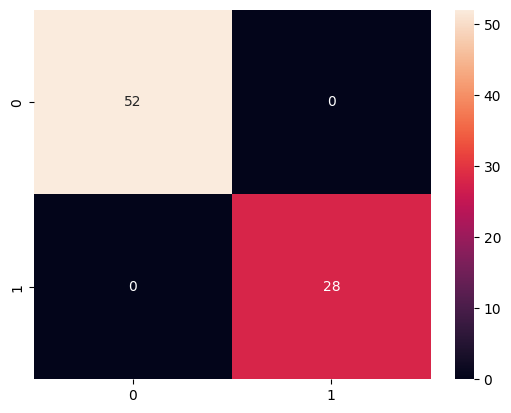

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(con_mat, annot = True)
plt.show()

In [48]:
rfc.predict([[3,3,5,1,2,3,5,3,2,3,4,1,5,2,3,4,5,1,2,3,2,3]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([0])